## K Means Clustering

In [ ]:
# Importing libraries

import pandas as pd

# Load the DataFrame from the pickle file
data_model = pd.read_pickle('data_clean_processed.pkl')


/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packa

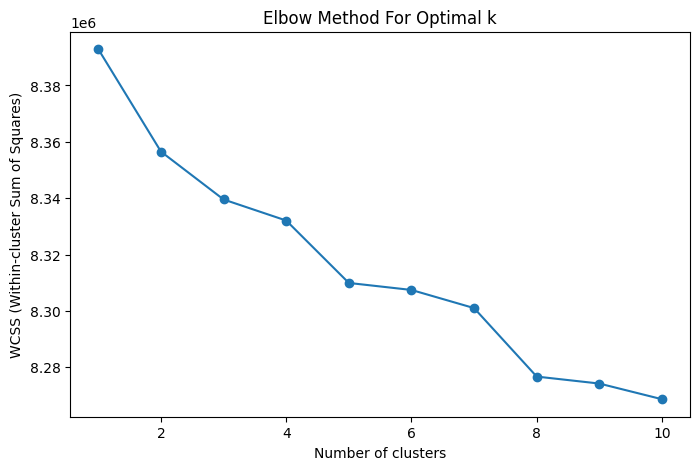

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()


In [5]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(3, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_model)
    score = silhouette_score(data_model, labels)
    print(f'k={k}, Silhouette Score={score:.4f}')


/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=3, Silhouette Score=-0.0033


/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=4, Silhouette Score=-0.1230


/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=5, Silhouette Score=-0.1156


In [10]:
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_model)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to your original DataFrame
data_model['cluster'] = labels


/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
import pandas as pd
pca_components = pd.read_pickle('pca_components.pkl')
data_model[['PC1', 'PC2']] = pca_components


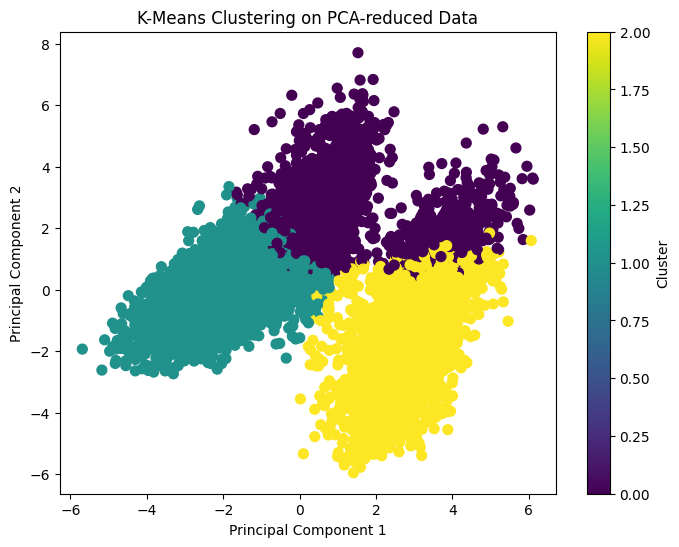

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(data_model['PC1'], data_model['PC2'], c=data_model['cluster'], cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-reduced Data')
plt.colorbar(scatter, label='Cluster')
plt.show()


#### Which Evaluation metrics did you consider for a positive business impact and why?

##### Elbow Method

* Used to find the optimal number of clusters (k) by plotting the Within-Cluster Sum of Squares (inertia) against different k values.

* The “elbow” point indicates where adding more clusters doesn’t significantly reduce cluster variance, helping avoid over- or under-clustering.

* Ensures clusters are compact and reduces complexity, which is important for creating actionable and interpretable segments.

##### Silhouette Score

* Complements the Elbow Method by measuring how well each point fits within its cluster compared to other clusters.

* Values range from -1 to 1, with higher values indicating better-defined and well-separated clusters.

* Helps validate the quality of clusters from a cohesion and separation perspective, confirming that segments are meaningful.


##### Why this matters for business impact on Netflix:
* Selecting the right number of clusters ensures Netflix’s user or content segments are neither too broad nor too fragmented, improving targeting accuracy.

* Good cluster quality (high silhouette score) means each segment reflects distinct viewing behaviors or content preferences, enabling personalized recommendations and marketing.

* Ultimately, this leads to better user engagement, satisfaction, and retention, positively impacting Netflix’s business metrics.

## DBSCAN Clustering

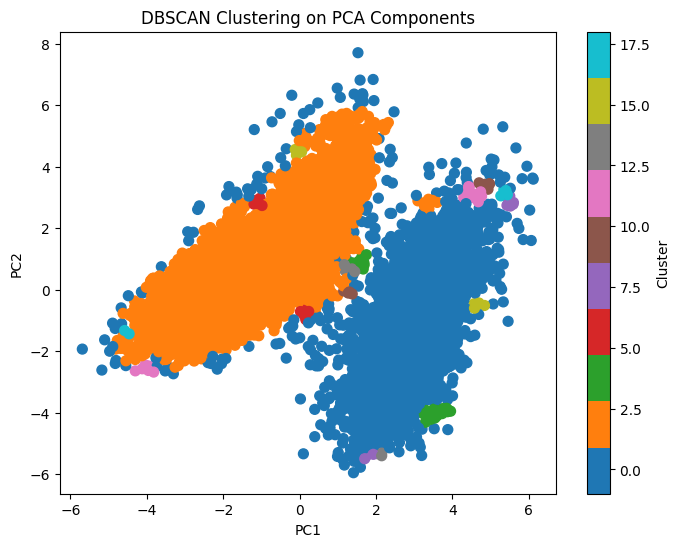

In [17]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Use PCA components from your DataFrame as input (assuming already scaled if needed)
X = data_model[['PC1', 'PC2']].values

# Initialize DBSCAN — tune eps and min_samples based on your data
dbscan = DBSCAN(eps=0.2, min_samples=5)

# Fit and predict cluster labels
clusters = dbscan.fit_predict(X)

# Add cluster labels back to your DataFrame
data_model['dbscan_cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(data_model['PC1'], data_model['PC2'], c=data_model['dbscan_cluster'], cmap='tab10', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering on PCA Components')
plt.colorbar(scatter, label='Cluster')
plt.show()


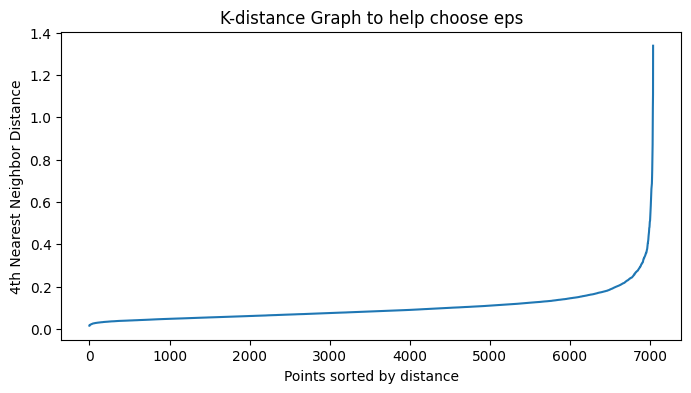

In [14]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Use your PCA data points
X = data_model[['PC1', 'PC2']].values

# Compute the distance to the 4th nearest neighbor (min_samples=5)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort the distances to the 4th nearest neighbor
distances = np.sort(distances[:, 4])

# Plot
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('K-distance Graph to help choose eps')
plt.show()
